In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv('onlinefoods.csv')
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [14]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


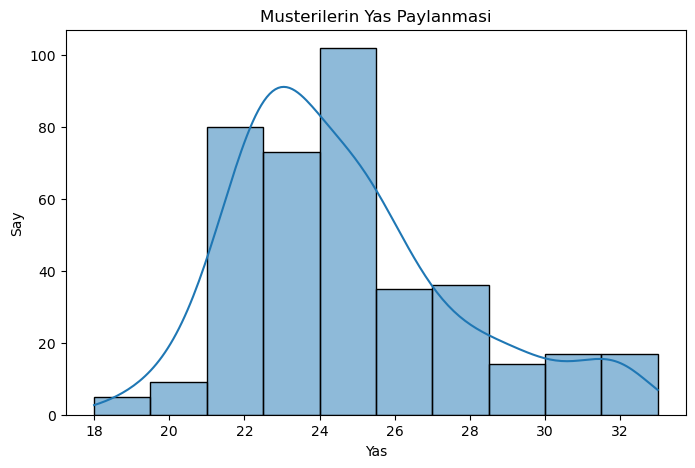

In [21]:
#1.What is the distribution of customers' ages in the dataset?
plt.figure(figsize=(8,5))
sns.histplot(df['Age'],bins=10,kde=True)
plt.title("Age distribution of customers")
plt.xlabel("Age")
plt.ylabel("Number")
plt.show()

In [17]:
#2.	How many male and female customers are there in the dataset? 
gender_counts=df['Gender'].value_counts()
print(gender_counts)

Gender
Male      222
Female    166
Name: count, dtype: int64


In [22]:
#3.	What are the different marital statuses represented in the dataset, and what is their distribution?
marital_counts=df['Marital Status'].value_counts()
print(marital_counts)

Marital Status
Single               268
Married              108
Prefer not to say     12
Name: count, dtype: int64


In [23]:
#4.	What are the most common occupations among the customers?
print(df['Occupation'].value_counts().head(10))

Occupation
Student           207
Employee          118
Self Employeed     54
House wife          9
Name: count, dtype: int64


In [25]:
#5.	How many customers fall into each category of educational qualifications?
print(df['Educational Qualifications'].value_counts())

Educational Qualifications
Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: count, dtype: int64


In [28]:
#6.	What is the average family size of customers?
print("Ortalama aile olcusu:",df['Family size'].mean())

Average family size: 3.2809278350515463


In [29]:
#7.	What are the most common pin codes among customers?
print(df['Pin code'].value_counts())

Pin code
560009    36
560038    16
560010    14
560076    12
560095    11
560034    11
560036     9
560075     9
560043     8
560029     8
Name: count, dtype: int64


In [ ]:
#8.	What percentage of customers provided feedback after receiving their orders?
feedback_percentage = df['Feedback'].notnull().mean() * 100
print(f"Müştərilərin {feedback_percentage:.2f}% -i rəy verib.")

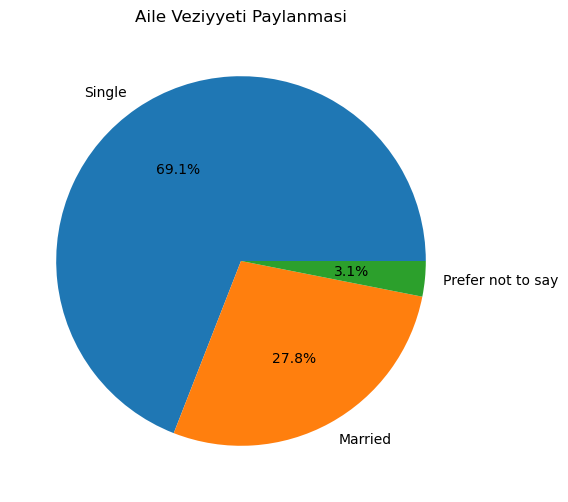

In [33]:
#1.Use a pie chart to illustrate the proportion of customers in each marital status category. This will give you a quick overview of marital status distribution.
df['Marital Status'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(6,6),title='Aile Veziyyeti Paylanmasi')
plt.ylabel('')
plt.show()

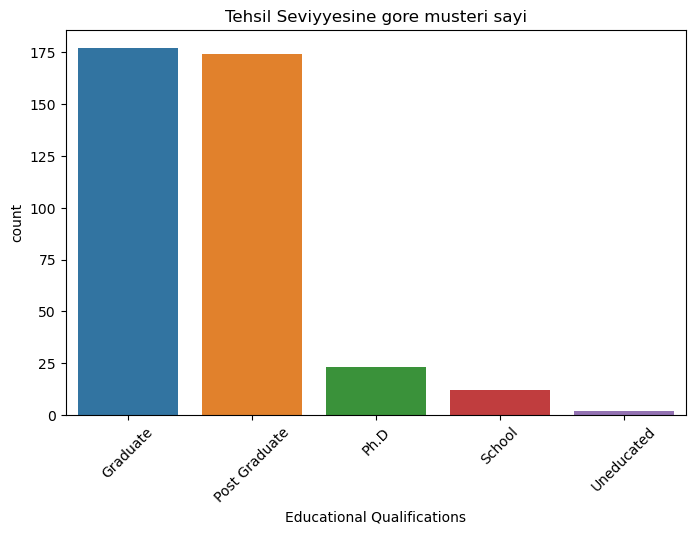

In [37]:
#2.	Generate a bar chart to display the count of customers in each educational qualification category. This will provide insights into the educational background of your customer base.
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Educational Qualifications',order=df['Educational Qualifications'].value_counts().index)
plt.title("Number of customers by educational level")
plt.xticks(rotation=45)
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


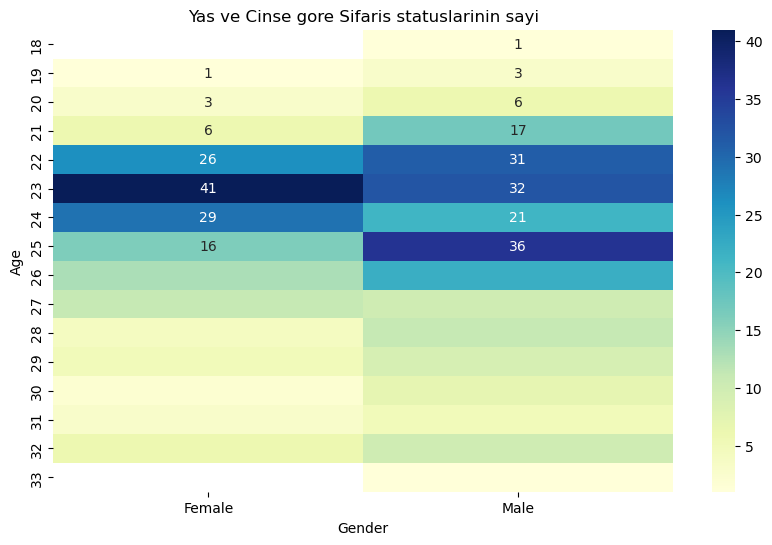

In [39]:
#3.	Generate a heatmap to visualize the distribution of order statuses based on age and gender. This will help you identify any patterns or trends in order status across different demographic groups.
pivot=df.pivot_table(index='Age',columns='Gender',values='Output',aggfunc='count')
plt.figure(figsize=(10,6))
sns.heatmap(pivot,cmap='YlGnBu',annot=True,fmt='g')
plt.title("Yas ve Cinse gore Sifaris statuslarinin sayi")
plt.show()

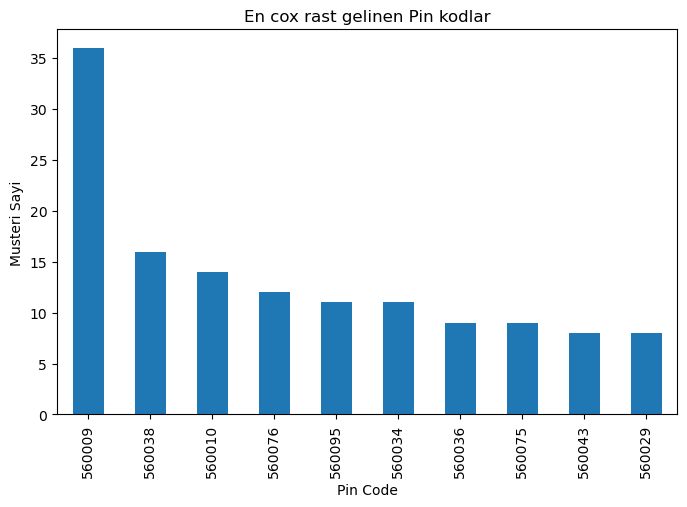

In [42]:
#4.Generate a bar chart to display the top N most common pin codes among customers. 
top_pins=df['Pin code'].value_counts().head(10)
top_pins.plot(kind='bar',figsize=(8,5),title='En cox rast gelinen Pin kodlar')
plt.xlabel('Pin Code')
plt.ylabel('Musteri Sayi')
plt.show()

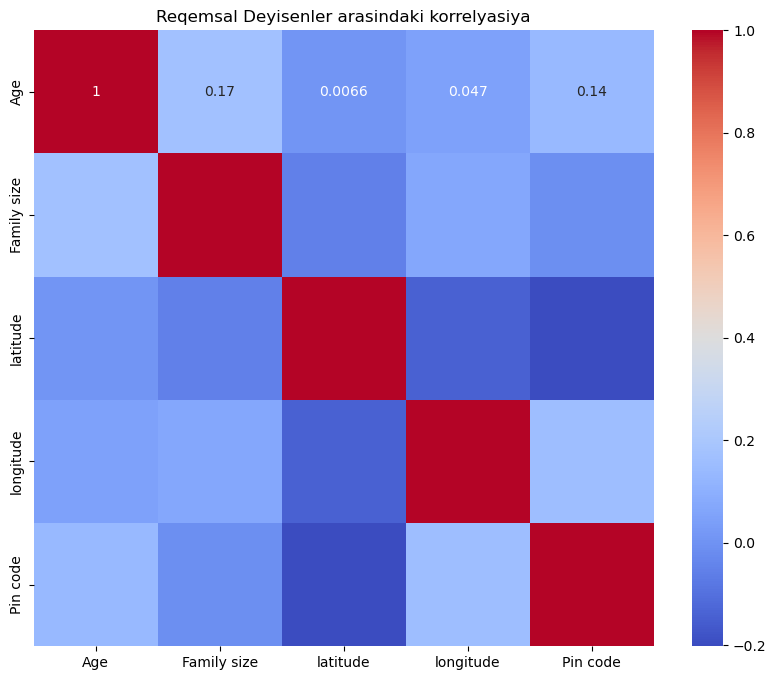

In [43]:
#5.	Create a heatmap of the correlation matrix to visualize the correlations between different numerical attributes. This will help you identify any relationships or dependencies between variable.
numeric_cols=df.select_dtypes(include=['float64','int64'])
corr=numeric_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Reqemsal Deyisenler arasindaki korrelyasiya")
plt.show()